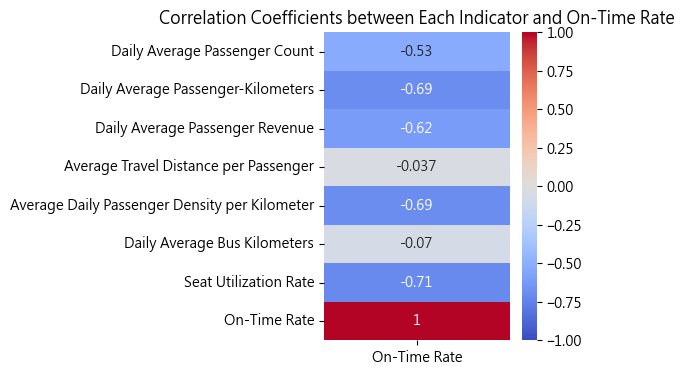

,On-Time Rate
Daily Average Passenger Count,-0.525068
Daily Average Passenger-Kilometers,-0.689834
Daily Average Passenger Revenue,-0.615515
Average Travel Distance per Passenger,-0.036531
Average Daily Passenger Density per Kilometer,-0.689853
Daily Average Bus Kilometers,-0.070297
Seat Utilization Rate,-0.708009
On-Time Rate,1.000000


In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family='Microsoft JhengHei, Arial')

df = pd.DataFrame()

## 2021, 2025
for year in range(2023, 2024):
    theRange = range(1, 13)
    if year == 2020:
        theRange = range(10, 13)
    elif year == 2024:
        theRange = range(1, 10)
    for month in theRange:
        csvData = pd.read_csv(f"D:/linear-algebra-project/台鐵數據csv/{year}-{str(month).zfill(2)}.csv", encoding="Big5")
        df = pd.concat(
            [
                df, 
                csvData.iloc[2:10, 3:4].reset_index(drop=True).transpose()
            ],
            axis=0, ignore_index=True)
        if (year == 2020 and 10 <= month <= 12) or (year == 2021 and 1 <= month <= 9):
            df = pd.concat(
            [
                df, 
                csvData.iloc[2:10, 4:5].reset_index(drop=True).transpose()
            ],
            axis=0, ignore_index=True)

df.rename(columns={
    0: "Daily Average Passenger Count",
    1: "Daily Average Passenger-Kilometers",
    2: "Daily Average Passenger Revenue",
    3: "Average Travel Distance per Passenger",
    4: "Average Daily Passenger Density per Kilometer",
    5: "Daily Average Bus Kilometers",
    6: "Seat Utilization Rate",
    7: "On-Time Rate"
}, inplace=True)
df.replace(",", "", regex=True, inplace=True)
# display(df)

correlations = df.corr()

plt.figure(figsize=(3, 4))
sns.heatmap(correlations["On-Time Rate"].to_frame(), annot=True, cmap="coolwarm", vmax=1, vmin=-1)
plt.title("Correlation Coefficients between Each Indicator and On-Time Rate")
plt.show()

display(correlations["On-Time Rate"].to_frame())


,Accidents,Events,Total,On-Time Rate
0,4,74,78,84.88
1,5,43,48,93.19
2,3,40,43,94.05
3,10,47,57,86.09
4,4,61,65,94.81
5,4,51,55,97.53
6,3,52,55,97.57
7,5,73,78,93.98
8,1,47,48,94.67
9,1,54,55,92.18


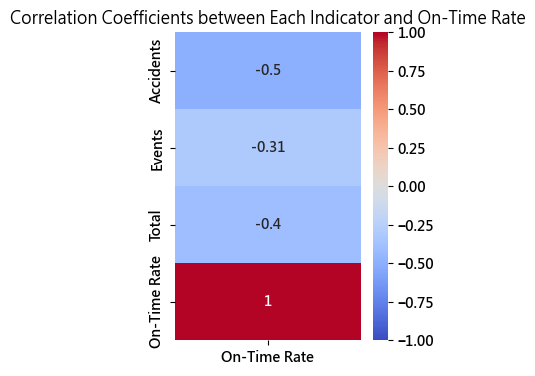

,On-Time Rate
Accidents,-0.495342
Events,-0.306353
Total,-0.401928
On-Time Rate,1.000000


In [70]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family='Microsoft JhengHei, Arial')

df = pd.DataFrame()

errorData = pd.read_csv(f"D:/linear-algebra-project/故障事故率.csv")

errorI = 12

for year in range(2021, 2022):
    theRange = range(1, 13)
    if year == 2020:
        theRange = range(10, 13)
    elif year == 2024:
        theRange = range(1, 10)
    for month in theRange:
        csvData = pd.read_csv(f"D:/linear-algebra-project/台鐵數據csv/{year}-{str(month).zfill(2)}.csv", encoding="Big5")
        df = pd.concat(
            [
                df, 
                pd.DataFrame([
                    [errorData.iat[errorI, 1], errorData.iat[errorI, 2], errorData.iat[errorI, 3], csvData.iat[9, 3]]
                ])
            ],
            axis=0, ignore_index=True)
        errorI+=1

df.rename(columns={0: "Accidents", 1: "Events", 2: "Total", 3: "On-Time Rate"}, inplace=True)
df.replace(",", "", regex=True, inplace=True)
display(df)

correlations = df.corr()

plt.figure(figsize=(3, 4))
sns.heatmap(correlations["On-Time Rate"].to_frame(), annot=True, cmap='coolwarm', vmax = 1, vmin = -1)
plt.title("Correlation Coefficients between Each Indicator and On-Time Rate")
plt.show()

display(correlations["On-Time Rate"].to_frame())


,Disaster Count,On-Time Rate
0,0,92.10
1,0,91.23
2,0,82.29
3,0,84.88
4,2,93.19
5,0,94.05
6,0,86.09
7,3,94.81
8,0,97.53
9,0,97.57


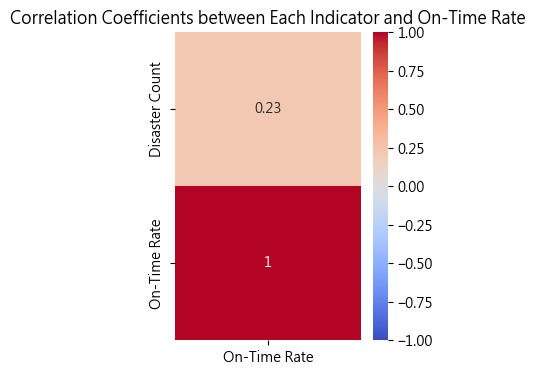

,On-Time Rate
Disaster Count,0.225699
On-Time Rate,1.000000


In [17]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family='Microsoft JhengHei, Arial')

df = pd.DataFrame()

errorData = pd.read_csv(f"D:/linear-algebra-project/天災表.csv")

errorI = 0

for year in range(2020, 2022):
    theRange = range(1, 13)
    if year == 2020:
        theRange = range(10, 13)
    elif year == 2024:
        theRange = range(1, 10)
    for month in theRange:
        csvData = pd.read_csv(f"D:/linear-algebra-project/台鐵數據csv/{year}-{str(month).zfill(2)}.csv", encoding="Big5")
        df = pd.concat(
            [
                df, 
                pd.DataFrame([
                    [errorData.iat[errorI, 1], csvData.iat[9, 3]]
                ])
            ],
            axis=0, ignore_index=True)
        errorI+=1

df.rename(columns={0: "Disaster Count", 1: "On-Time Rate"}, inplace=True)
df.replace(",", "", regex=True, inplace=True)
display(df)

correlations = df.corr()

plt.figure(figsize=(3, 4))
sns.heatmap(correlations["On-Time Rate"].to_frame(), annot=True, cmap='coolwarm', vmax = 1, vmin = -1)
plt.title("Correlation Coefficients between Each Indicator and On-Time Rate")
plt.show()

display(correlations["On-Time Rate"].to_frame())


In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

matplotlib.rc('font', family='Microsoft JhengHei, Arial')

df = pd.DataFrame()

errorData = pd.read_csv(f"D:/linear-algebra-project/故障事故率.csv")

errorI = 12

for year in range(2021, 2024):
    theRange = range(1, 13)
    if year == 2020:
        theRange = range(10, 13)
    elif year == 2024:
        theRange = range(1, 10)
    for month in theRange:
        csvData = pd.read_csv(f"D:/linear-algebra-project/台鐵數據csv/{year}-{str(month).zfill(2)}.csv", encoding="Big5")
        df = pd.concat(
            [
                df, 
                pd.DataFrame([
                    [errorData.iat[errorI, 1],
                     csvData.iat[2, 3],
                     csvData.iat[3, 3],
                     csvData.iat[4, 3],
                     csvData.iat[6, 3],
                     csvData.iat[8, 3],
                     csvData.iat[9, 3]]
                ])
            ],
            axis=0, ignore_index=True)
        errorI+=1

df.rename(columns={
    0: "Accidents", 
    1: "Daily Average Passenger Count",
    2: "Daily Average Passenger-Kilometers",
    3: "Daily Average Passenger Revenue",
    4: "Average Daily Passenger Density per Kilometer",
    5: "Seat Utilization Rate",
    6: "On-Time Rate"}, inplace=True)
df.replace(",", "", regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
display(df)

,Accidents,Daily Average Passenger Count,Daily Average Passenger-Kilometers,Daily Average Passenger Revenue,Average Daily Passenger Density per Kilometer,Seat Utilization Rate,On-Time Rate
0,4,528346,23724893,37670337,22433,51.15,84.88
1,5,546926,26624214,43976934,25174,56.45,93.19
2,3,580465,25705785,40751777,24306,55.80,94.05
3,10,601533,27499692,43967476,26002,59.09,86.09
4,4,327115,14267287,22566071,13490,32.49,94.81
5,4,115877,4177290,6011670,3950,10.88,97.53
6,3,163728,6880338,10994716,6506,17.05,97.57
7,5,294451,13635767,22094186,12893,29.86,93.98
8,1,383710,17361551,27972858,16416,38.06,94.67
9,1,476916,22240140,35216304,21029,48.37,92.18


In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

matplotlib.rc('font', family='Microsoft JhengHei, Arial')

futureDf = pd.DataFrame()

errorData = pd.read_csv(f"D:/linear-algebra-project/故障事故率.csv")

errorI = 48

for year in range(2024, 2025):
    theRange = range(1, 13)
    if year == 2020:
        theRange = range(10, 13)
    elif year == 2024:
        theRange = range(1, 10)
    for month in theRange:
        csvData = pd.read_csv(f"D:/linear-algebra-project/台鐵數據csv/{year}-{str(month).zfill(2)}.csv", encoding="Big5")
        futureDf = pd.concat(
            [
                futureDf,
                pd.DataFrame([
                    [errorData.iat[errorI, 1],
                     csvData.iat[2, 3],
                     csvData.iat[3, 3],
                     csvData.iat[4, 3],
                     csvData.iat[6, 3],
                     csvData.iat[8, 3],
                     csvData.iat[9, 3]]
                ])
            ],
            axis=0, ignore_index=True)
        errorI+=1

futureDf.rename(columns={
    0: "Accidents", 
    1: "Daily Average Passenger Count",
    2: "Daily Average Passenger-Kilometers",
    3: "Daily Average Passenger Revenue",
    4: "Average Daily Passenger Density per Kilometer",
    5: "Seat Utilization Rate",
    6: "On-Time Rate"}, inplace=True)
futureDf.replace(",", "", regex=True, inplace=True)
futureDf = futureDf.apply(pd.to_numeric, errors='coerce')
display(futureDf)

,Accidents,Daily Average Passenger Count,Daily Average Passenger-Kilometers,Daily Average Passenger Revenue,Average Daily Passenger Density per Kilometer,Seat Utilization Rate,On-Time Rate
0,5,629556,28440708,45147583,26892,55.84,96.30
1,5,659312,31767786,51947483,30038,61.43,95.87
2,8,669139,30201685,49207562,28557,59.14,95.55
3,2,652319,29349117,46491004,27751,57.29,91.49
4,4,647703,28460645,46092839,26911,56.14,95.40
5,3,642318,30003212,46609488,28369,58.55,94.34
6,3,580567,26753914,43111776,25297,55.71,90.47
7,5,645533,30537552,49499479,28874,58.87,84.75
8,4,649300,29832085,48697965,28207,57.60,93.43


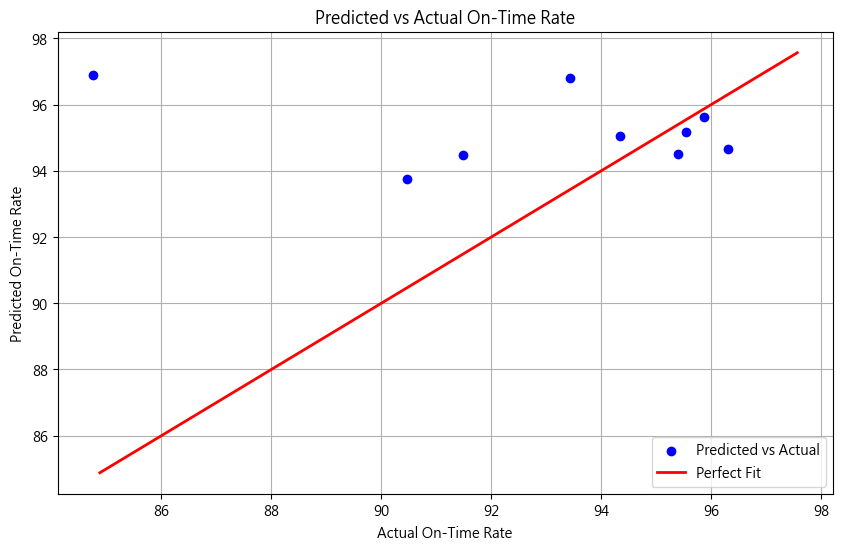

Model coefficients: [-1.17778390e-05  1.66661559e-03  4.96308681e-07 -1.76218326e+00
 -5.72595867e-01]
Model intercept: 100.5572068273127
y = -0.0000118 * x1 + 0.0016666 * x2 + 0.0000005 * x3 + -1.7621833 * x4 + -0.5725959 * x5  + 100.5572068


In [19]:
X = df.drop(columns=["On-Time Rate", "Accidents"])
y = df["On-Time Rate"]

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Get the predictions
y_pred = model.predict(futureDf.drop(columns=["On-Time Rate", "Accidents"]))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(futureDf["On-Time Rate"], y_pred,
            color='blue', label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual On-Time Rate")
plt.ylabel("Predicted On-Time Rate")
plt.title("Predicted vs Actual On-Time Rate")
plt.legend()
plt.grid(True)
plt.show()

# Optionally, display the coefficients and intercept
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")
print(f"y = {model.coef_[0]:.7f} * x1 + {model.coef_[1]:.7f} * x2 + {model.coef_[2]:.7f} * x3 + {model.coef_[3]:.7f} * x4 + {model.coef_[4]:.7f} * x5  + {model.intercept_:.7f}")

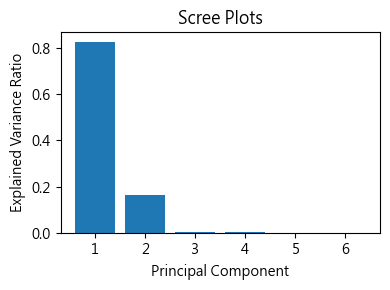

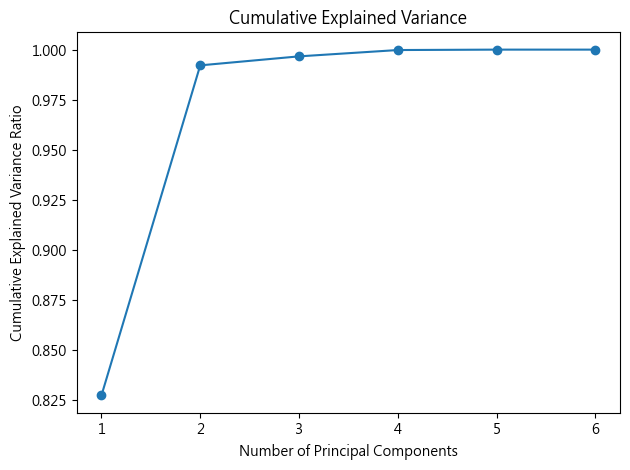

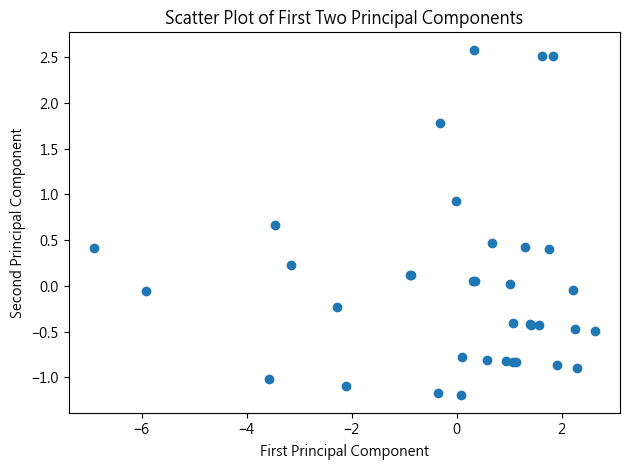

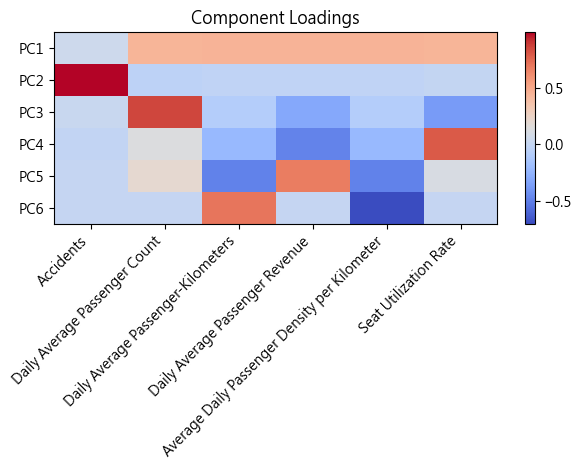

解釋變異數比例:
主成分 1: 82.71%
主成分 2: 16.51%
主成分 3: 0.45%
主成分 4: 0.32%
主成分 5: 0.02%
主成分 6: 0.00%

累積解釋變異數比例:
前 1 個主成分: 82.71%
前 2 個主成分: 99.21%
前 3 個主成分: 99.66%
前 4 個主成分: 99.98%
前 5 個主成分: 100.00%
前 6 個主成分: 100.00%

主成分負載:
                                                    PC1       PC2       PC3  \
Accidents                                      0.050540  0.998454  0.021020   
Daily Average Passenger Count                  0.443936 -0.039883  0.861884   
Daily Average Passenger-Kilometers             0.448479 -0.021805 -0.082387   
Daily Average Passenger Revenue                0.447046 -0.022240 -0.316045   
Average Daily Passenger Density per Kilometer  0.448479 -0.021806 -0.082317   
Seat Utilization Rate                          0.445252 -0.007310 -0.378506   

                                                    PC4       PC5  \
Accidents                                     -0.009344  0.002508   
Daily Average Passenger Count                  0.132574  0.202266   
Daily Average Passenger-Ki

In [16]:
# Prepare data for PCA
# Select numeric columns for PCA
features = [
    "Accidents",
    "Daily Average Passenger Count", 
    "Daily Average Passenger-Kilometers", 
    "Daily Average Passenger Revenue", 
    "Average Daily Passenger Density per Kilometer", 
    "Seat Utilization Rate", 
]

# Standardize the features
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotting results
plt.figure(figsize=(4, 3))

# Scree Plot (Explained Variance)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plots')

plt.tight_layout()
plt.show()

# Cumulative Explained Variance
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

# Scatter plot of first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of First Two Principal Components')

plt.tight_layout()
plt.show()

# Heatmap of component loadings
plt.imshow(pca.components_, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45, ha='right')
plt.yticks(range(len(pca.components_)), [f'PC{i+1}' for i in range(len(pca.components_))])
plt.title('Component Loadings')

plt.tight_layout()
plt.show()

# Print out detailed results
print("解釋變異數比例:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"主成分 {i}: {ratio * 100:.2f}%")

print("\n累積解釋變異數比例:")
for i, cum_ratio in enumerate(cumulative_variance_ratio, 1):
    print(f"前 {i} 個主成分: {cum_ratio * 100:.2f}%")

# Component loadings
print("\n主成分負載:")
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(len(pca.components_))], 
    index=features
)
print(loadings)

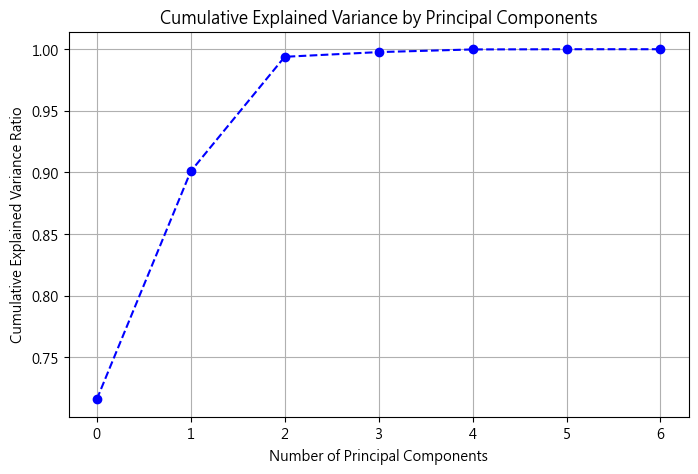

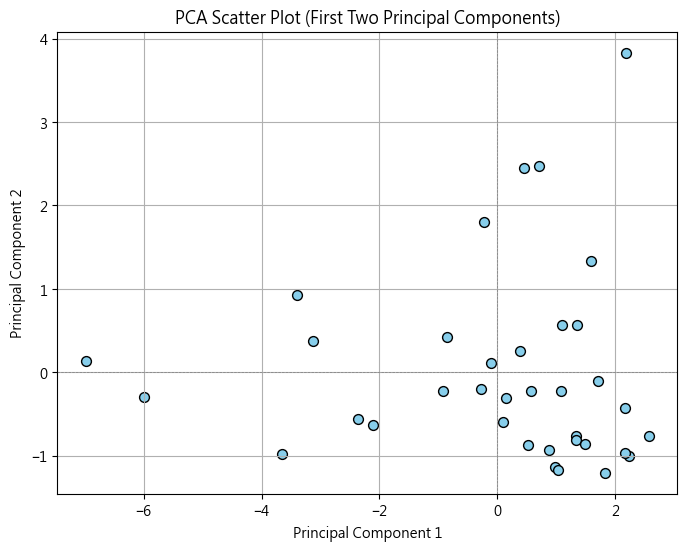

array([7.15794322e-01, 1.85090039e-01, 9.29688314e-02, 3.81105382e-03,
       2.15723890e-03, 1.78515574e-04, 1.57579823e-10])

In [39]:
# 数据标准化

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)



# PCA 分析

pca = PCA()

pca_data = pca.fit_transform(scaled_data)



# 累积解释变异图

plt.figure(figsize=(8, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')

plt.title('Cumulative Explained Variance by Principal Components')

plt.xlabel('Number of Principal Components')

plt.ylabel('Cumulative Explained Variance Ratio')

plt.grid()

plt.show()



# 主成分散布图（前两主成分）

plt.figure(figsize=(8, 6))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c='skyblue', edgecolor='k', s=50)

plt.title('PCA Scatter Plot (First Two Principal Components)')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.grid()

plt.show()



# 输出结果

explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio

Mean Squared Error: 1.7105
R-squared: 0.4208


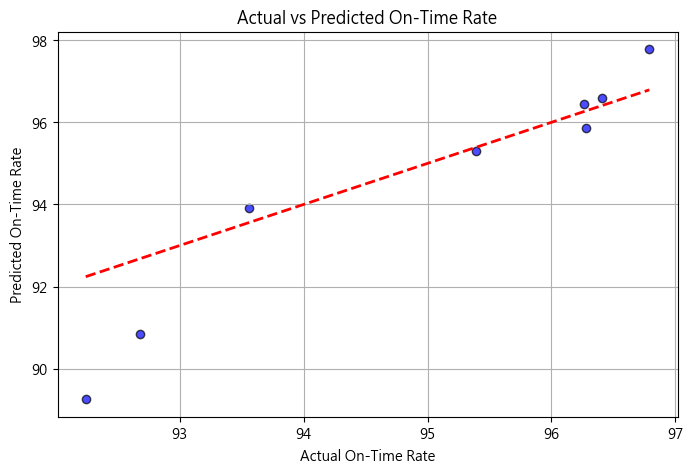

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# 使用前兩個主成分
X = pca_data[:, :2]
y = df["On-Time Rate"]

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 模型評估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.7f}")
print(f"R-squared: {r2:.7f}")

# 視覺化結果
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual On-Time Rate")
plt.ylabel("Predicted On-Time Rate")
plt.title("Actual vs Predicted On-Time Rate")
plt.grid()
plt.show()